In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
class Perceptron:
    
    def __init__(self, x, y, w,eta):
        self.x = x
        self.y = y
        self.w = w
        self.eta = eta
        
    def predict(self):
        h = np.dot(self.x,self.w.T)
        h_sign = np.zeros(h.size)
        for i in range(h_sign.size):
            if h[i] > 0:
                h_sign[i] = 1
            else:
                h_sign[i] = -1
        return h_sign
    
    def misclassified(self, h):
        miscls = []
        for i in range(self.y.size):
            if self.y[i] != h[i]:
                miscls.append(i)
        miscls = np.array(miscls)
        return miscls
        
    def train(self):
        count = 0
        while True:
            h = self.predict()
            miscls = self.misclassified(h)
            if(count < 1000):
                if miscls.size > 0:
                    t = np.random.choice(miscls)
                    self.weight_update(self.y[t],self.x[t])
                else:
                    return self.w,count
            else:
                 return self.w,count
            count = count + 1
            
    def weight_update(self,y_t,x_t):
        s_t = np.sum(x_t*self.w)
        if y_t*s_t <= 1:
            self.w = self.w + self.eta*(y_t - s_t)*x_t

In [321]:
def sign(x,w):
    return np.sign(np.dot(w,x.T))
    
def generate_data(n_train,n_test):
    w = np.random.randint(low=-100,high= 100,size = 3)
    y_train = np.zeros(n_train)
    y_test = np.zeros(n_test)
    x_train = []
    x_test = []
    for i in range(n_train):
        x_i = [1,np.random.uniform(-1,1), np.random.uniform(-1,1)]
        x_train.append(x_i)
    x_train = np.array(x_train)
    for i in range(n_test):
        x_i = [1,np.random.uniform(-1,1), np.random.uniform(-1,1)]
        x_test.append(x_i)
    x_test = np.array(x_test)
    y_train = sign(x_train,w)
    y_test = sign(x_test,w)
    return x_train, y_train, w, x_test, y_test

def abline(slope, intercept, col,label):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals,col,label = label)

Number of updates that the algorithm takes before converging:143


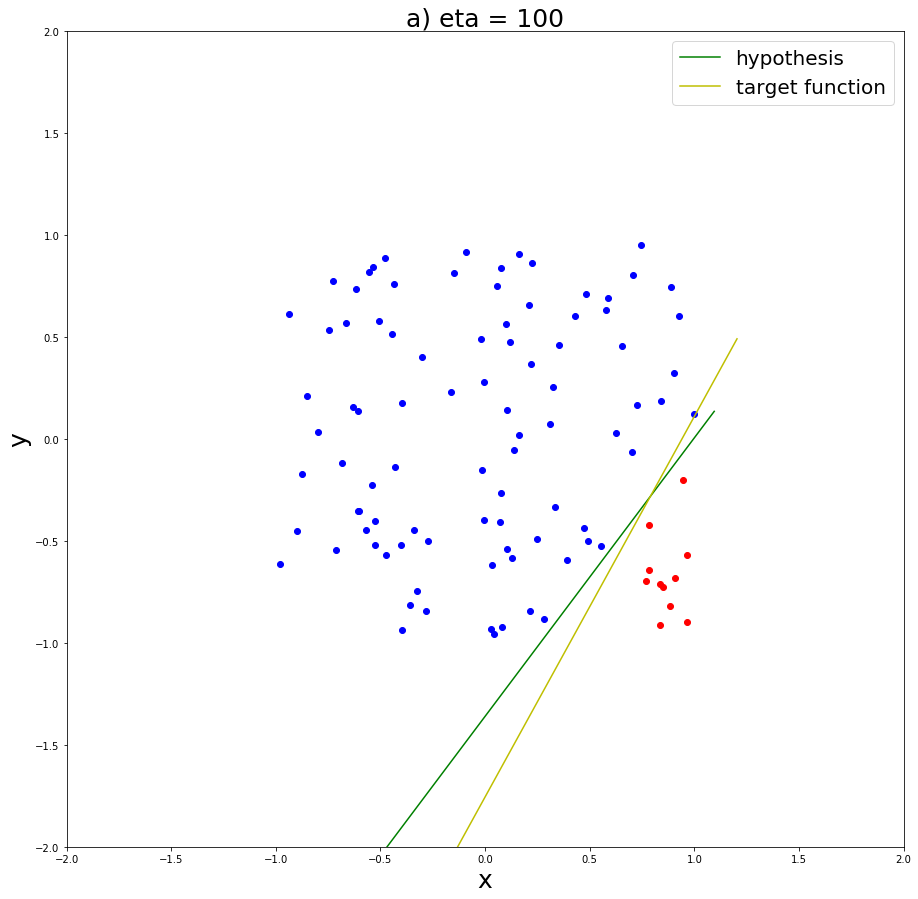

Error rate: 1.419999999999997


In [402]:
#Part a) eta = 100
x_train, y_train, ideal_weight,x_test, y_test = generate_data(100,10000)
w = np.zeros(3)
eta = 100
newP = Perceptron(x_train, y_train, w, eta)
weights,count = newP.train()
print("Number of updates that the algorithm takes before converging:"+  str(count) )
plt.figure(figsize=(15,15))
#Class 1
plt.plot(x_train[np.where(y_train==1),1],x_train[np.where(y_train==1),2], 'ro')
#Class 2
plt.plot(x_train[np.where(y_train==-1),1],x_train[np.where(y_train==-1),2], 'bo')
#Hypothesis in green
abline(slope = -(weights[1]/weights[2]),intercept = -(weights[0]/weights[2]),col='-g',label="hypothesis")
#Target function in yellow
abline(slope = -(ideal_weight[1]/ideal_weight[2]),intercept = -(ideal_weight[0]/ideal_weight[2]),col='-y',label="target function")
plt.axis([-2, 2,-2, 2])
plt.xlabel('x', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.legend(loc='best', fontsize=20)
plt.title('a) eta = 100', fontsize=25)
plt.show()
y_pred = sign(x_test,weights)
print("Error rate: "+str(sum((y_pred != y_test)/y_test.size)*100))

Number of updates that the algorithm takes before converging:7


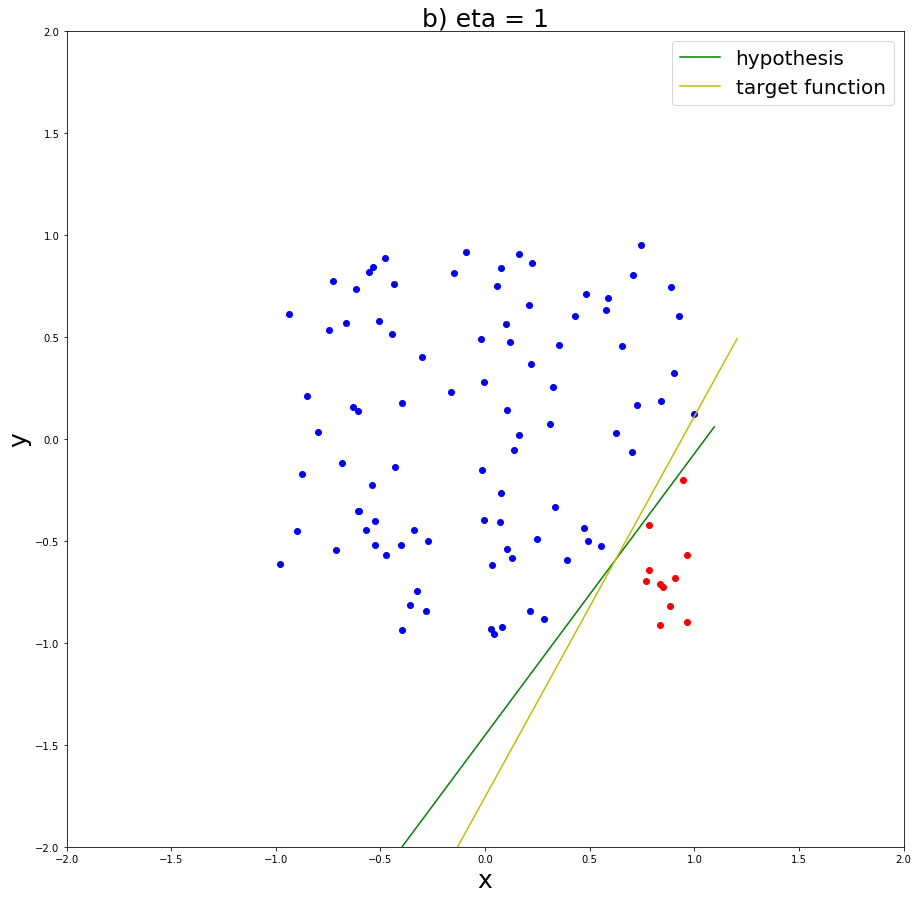

Error rate: 1.1699999999999984


In [406]:
#Part b) eta = 1
w = np.zeros(3)
eta = 1
newP = Perceptron(x_train, y_train, w, eta)
weights,count = newP.train()
print("Number of updates that the algorithm takes before converging:"+  str(count) )
plt.figure(figsize=(15,15))
#Class 1
plt.plot(x_train[np.where(y_train==1),1],x_train[np.where(y_train==1),2], 'ro')
#Class 2
plt.plot(x_train[np.where(y_train==-1),1],x_train[np.where(y_train==-1),2], 'bo')
#Hypothesis in green
abline(slope = -(weights[1]/weights[2]),intercept = -(weights[0]/weights[2]),col='-g',label="hypothesis")
#Target function in yellow
abline(slope = -(ideal_weight[1]/ideal_weight[2]),intercept = -(ideal_weight[0]/ideal_weight[2]),col='-y',label="target function")
plt.axis([-2, 2,-2, 2])
plt.xlabel('x', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.legend(loc='best', fontsize=20)
plt.title('b) eta = 1', fontsize=25)
plt.show()
y_pred = sign(x_test,weights)
print("Error rate: "+str(sum((y_pred != y_test)/y_test.size)*100))

Number of updates that the algorithm takes before converging:25


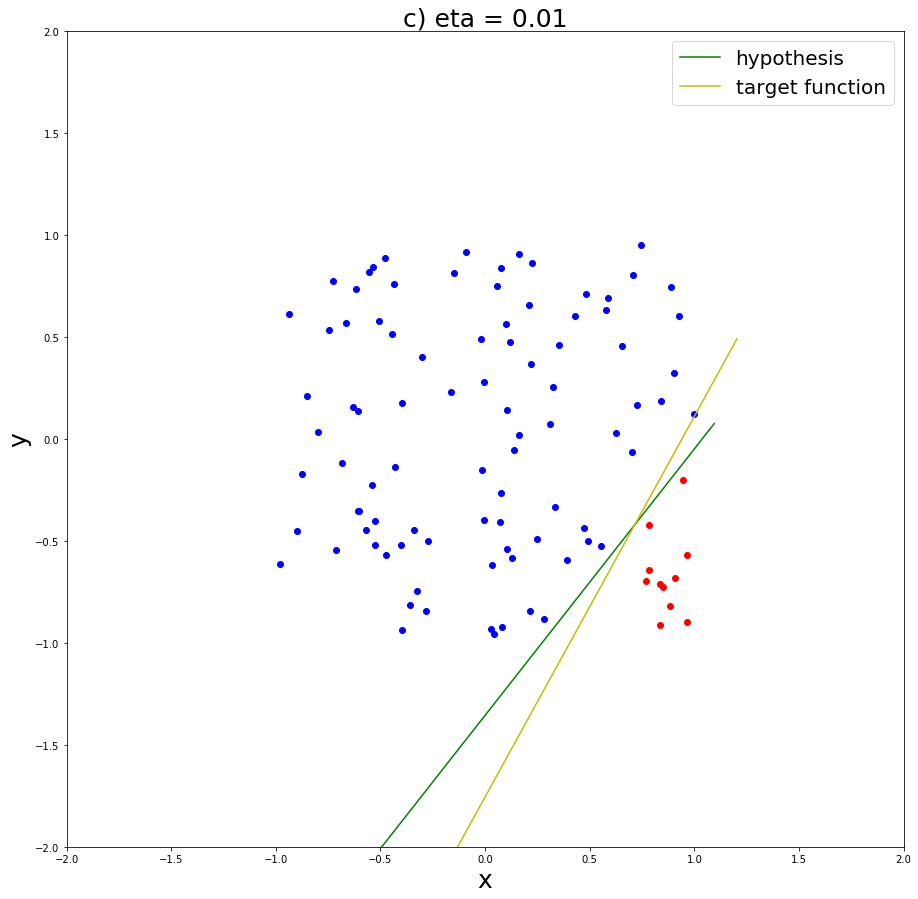

Error rate: 1.4399999999999968


In [407]:
#Part c) eta = 0.01
w = np.zeros(3)
eta = 0.01
newP = Perceptron(x_train, y_train, w, eta)
weights,count = newP.train()
print("Number of updates that the algorithm takes before converging:"+  str(count) )
plt.figure(figsize=(15,15))
#Class 1
plt.plot(x_train[np.where(y_train==1),1],x_train[np.where(y_train==1),2], 'ro')
#Class 2
plt.plot(x_train[np.where(y_train==-1),1],x_train[np.where(y_train==-1),2], 'bo')
#Hypothesis in green
abline(slope = -(weights[1]/weights[2]),intercept = -(weights[0]/weights[2]),col='-g',label="hypothesis")
#Target function in yellow
abline(slope = -(ideal_weight[1]/ideal_weight[2]),intercept = -(ideal_weight[0]/ideal_weight[2]),col='-y',label="target function")
plt.axis([-2, 2,-2, 2])
plt.xlabel('x', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.legend(loc='best', fontsize=20)
plt.title('c) eta = 0.01', fontsize=25)
plt.show()
y_pred = sign(x_test,weights)
print("Error rate: "+str(sum((y_pred != y_test)/y_test.size)*100))

Number of updates that the algorithm takes before converging:38


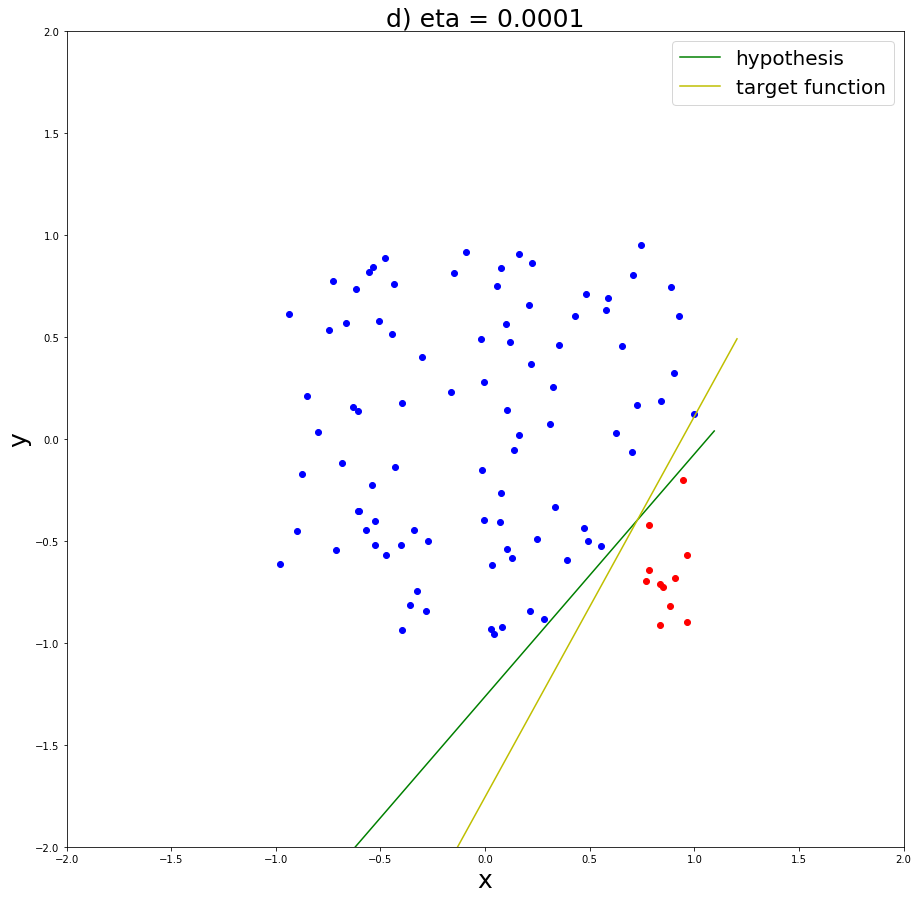

Error rate: 2.079999999999993


In [408]:
#Part c) eta = 0.0001
w = np.zeros(3)
eta = 0.0001
newP = Perceptron(x_train, y_train, w, eta)
weights,count = newP.train()
print("Number of updates that the algorithm takes before converging:"+  str(count) )
plt.figure(figsize=(15,15))
#Class 1
plt.plot(x_train[np.where(y_train==1),1],x_train[np.where(y_train==1),2], 'ro')
#Class 2
plt.plot(x_train[np.where(y_train==-1),1],x_train[np.where(y_train==-1),2], 'bo')
#Hypothesis in green
abline(slope = -(weights[1]/weights[2]),intercept = -(weights[0]/weights[2]),col='-g',label="hypothesis")
#Target function in yellow
abline(slope = -(ideal_weight[1]/ideal_weight[2]),intercept = -(ideal_weight[0]/ideal_weight[2]),col='-y',label="target function")
plt.axis([-2, 2,-2, 2])
plt.xlabel('x', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.legend(loc='best', fontsize=20)
plt.title('d) eta = 0.0001', fontsize=25)
plt.show()
y_pred = sign(x_test,weights)
print("Error rate: "+str(sum((y_pred != y_test)/y_test.size)*100))